In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [2]:
save_path = "./plots"

In [3]:
# 한글 폰트 설정
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"  # 시스템에서 설치된 폰트 경로 확인
font_prop = fm.FontProperties(fname=font_path)  # FontProperties 생성

# matplotlib에 폰트 설정
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# 5.구성원 컬처핏 분석(37페이지부터)

## 가.온라인 설문 진단 통계

### 1.응답률

In [4]:
## 파이 차트
data = {
    "인사하위영역": ["본사", "센터", "역"],
    "응답율": [58.3, 32.6, 51.1]
}

labels = ['', '']
sizes = [133 + 127 + 47, 95 + 263 + 45]
colors = ["#39C039", "#868e96"]

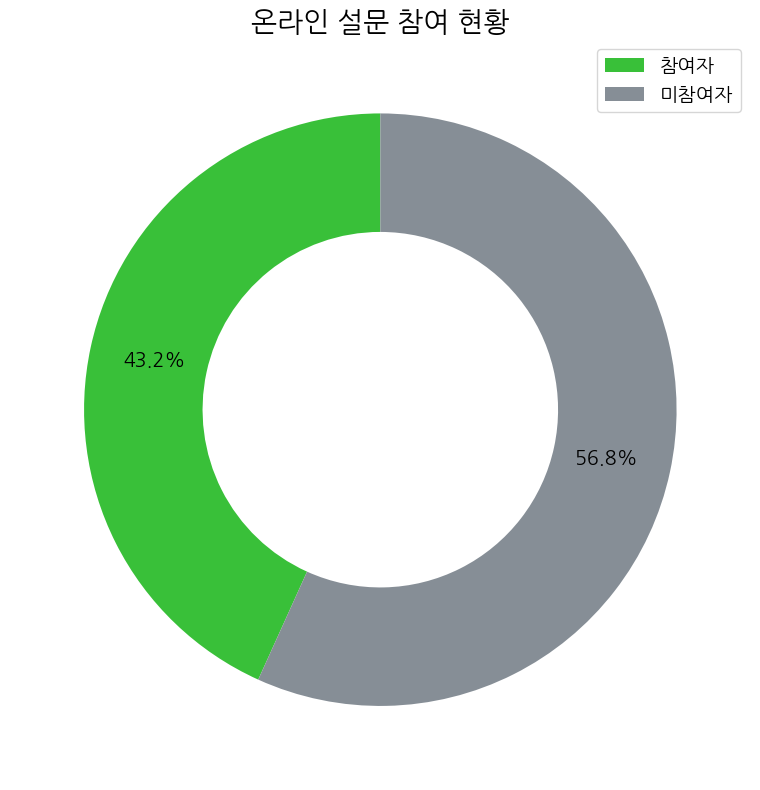

In [5]:
plt.figure(figsize=(8, 8))

text_and_label_size = 14
new_font_prop = font_prop.copy()
new_font_prop.set_size(text_and_label_size)

wedges, texts, autotexts = plt.pie(
    sizes, 
    labels=labels, 
    colors=colors, 
    autopct="%.1f%%", 
    startangle=90, 
    wedgeprops={"width": 0.4}, 
    textprops={"fontproperties": new_font_prop}  # 폰트 크기 적용 완료
)

# 퍼센트 텍스트 위치를 바깥쪽으로 조정
for autotext in autotexts:
    x, y = autotext.get_position()
    # autotext.set_color("white")
    autotext.set_fontweight("bold")
    autotext.set_position((x * 1.3, y * 1.3))  # 바깥쪽으로 이동

# 범례 폰트 크기 설정
legend_font_prop = font_prop.copy()
legend_font_prop.set_size(text_and_label_size)

# 범례 추가
plt.legend(wedges, ['참여자', '미참여자'], prop=legend_font_prop, loc="upper right")

# 제목 폰트 크기 설정
title_font_prop = font_prop.copy()
title_font_prop.set_size(20)

# 그래프 제목 설정
plt.title("온라인 설문 참여 현황", fontproperties=title_font_prop, fontweight="bold")

# 그래프 저장 및 출력
plt.tight_layout()
plt.savefig(f"{save_path}/00-온라인 설문 참여 현황.png", dpi=300, bbox_inches="tight")
plt.show()


### 2. 본사/현업 참여율

In [6]:
# 데이터
labels = ['', '']
sizes = [57.9, 36.31]  # 응답률
colors = ["#39C039", "#4971FF"]

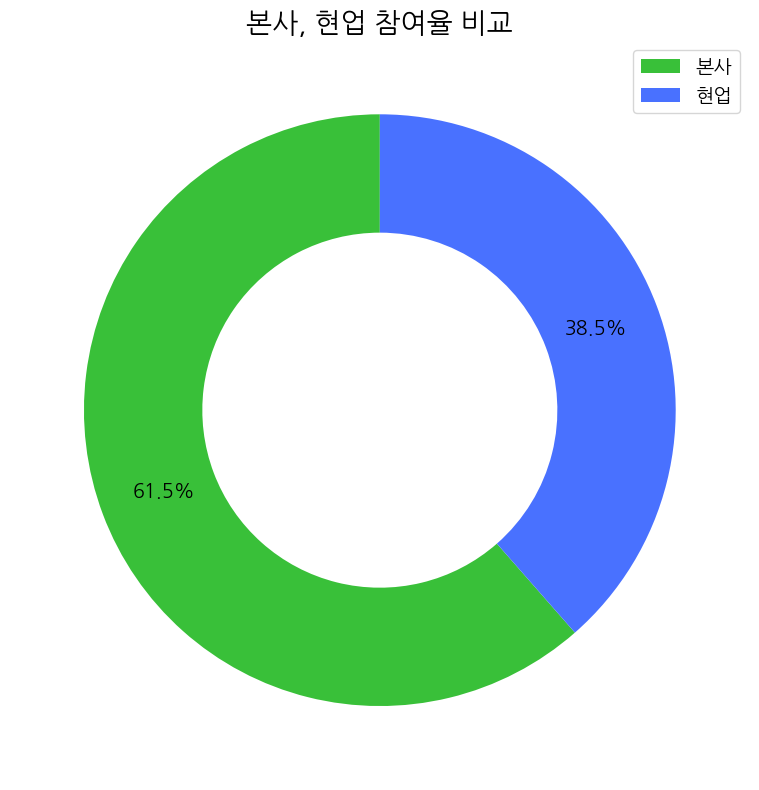

In [7]:
plt.figure(figsize=(8, 8))

text_and_label_size = 14
new_font_prop = font_prop.copy()
new_font_prop.set_size(text_and_label_size)

wedges, texts, autotexts = plt.pie(
    sizes, 
    labels=labels, 
    colors=colors, 
    autopct="%.1f%%", 
    startangle=90, 
    wedgeprops={"width": 0.4}, 
    textprops={"fontproperties": new_font_prop}  # 폰트 크기 적용 완료
)

# 퍼센트 텍스트 위치를 바깥쪽으로 조정
for autotext in autotexts:
    x, y = autotext.get_position()
    autotext.set_position((x * 1.3, y * 1.3))  # 바깥쪽으로 이동

# 범례 폰트 크기 설정
legend_font_prop = font_prop.copy()
legend_font_prop.set_size(text_and_label_size)

# 범례 추가
plt.legend(wedges, ['본사', '현업'], prop=legend_font_prop, loc="upper right")

# 제목 폰트 크기 설정
title_font_prop = font_prop.copy()
title_font_prop.set_size(20)

# 그래프 제목 설정
plt.title("본사, 현업 참여율 비교", fontproperties=title_font_prop, fontweight="bold")

# 그래프 저장 및 출력
plt.tight_layout()
plt.savefig(f"{save_path}/01-본사, 현업 참여율 비교.png", dpi=300, bbox_inches="tight")
plt.show()

### 3.본사 부서별 참여인원, 참여율

In [8]:
def plot_data(data, title):
    departments = data['부서명'].tolist()
    num_people = data['인원'].tolist()
    participation_rate = data['참여율'].tolist()  # 참여율은 이미 소수로 처리됨

    x = np.arange(len(departments))

    text_and_label_size = 14
    title_font_size = 20

    # 그래프 생성
    fig, ax1 = plt.subplots(figsize=(15, 6))

    # 막대 그래프 (인원)
    bar_width = 0.6
    ax1.bar(x, num_people, color='#1246FF', alpha=0.7, label="인원", width=bar_width)
    ax1.set_xlabel("부서명", fontsize=text_and_label_size)
    ax1.set_ylabel("인원", color='#1246FF', fontsize=text_and_label_size)
    ax1.tick_params(axis='y', labelcolor='#1246FF', labelsize=text_and_label_size)
    ax1.set_xticks(x)
    ax1.set_xticklabels(departments, rotation=90, ha="right", fontsize=text_and_label_size)

    # 선 그래프 (참여율)
    ax2 = ax1.twinx()
    ax2.plot(x, participation_rate, color='#0AA00A', marker='o', label="참여율")
    ax2.set_ylabel("참여율", color='#0AA00A', fontsize=text_and_label_size)
    ax2.tick_params(axis='y', labelcolor='#0AA00A', labelsize=text_and_label_size)
    ax2.set_ylim(0, 1)  # 참여율(%) 범위 조정

    # 범례 추가
    fig.legend(loc="upper right", bbox_to_anchor=(1.1, 1), fontsize=text_and_label_size)

    # 제목 설정
    plt.title(title, fontsize=title_font_size, pad=20)

    # 그래프 출력
    plt.tight_layout()
    plt.savefig(f"{save_path}/02-{title}.png", dpi=300, bbox_inches="tight")
    plt.show()

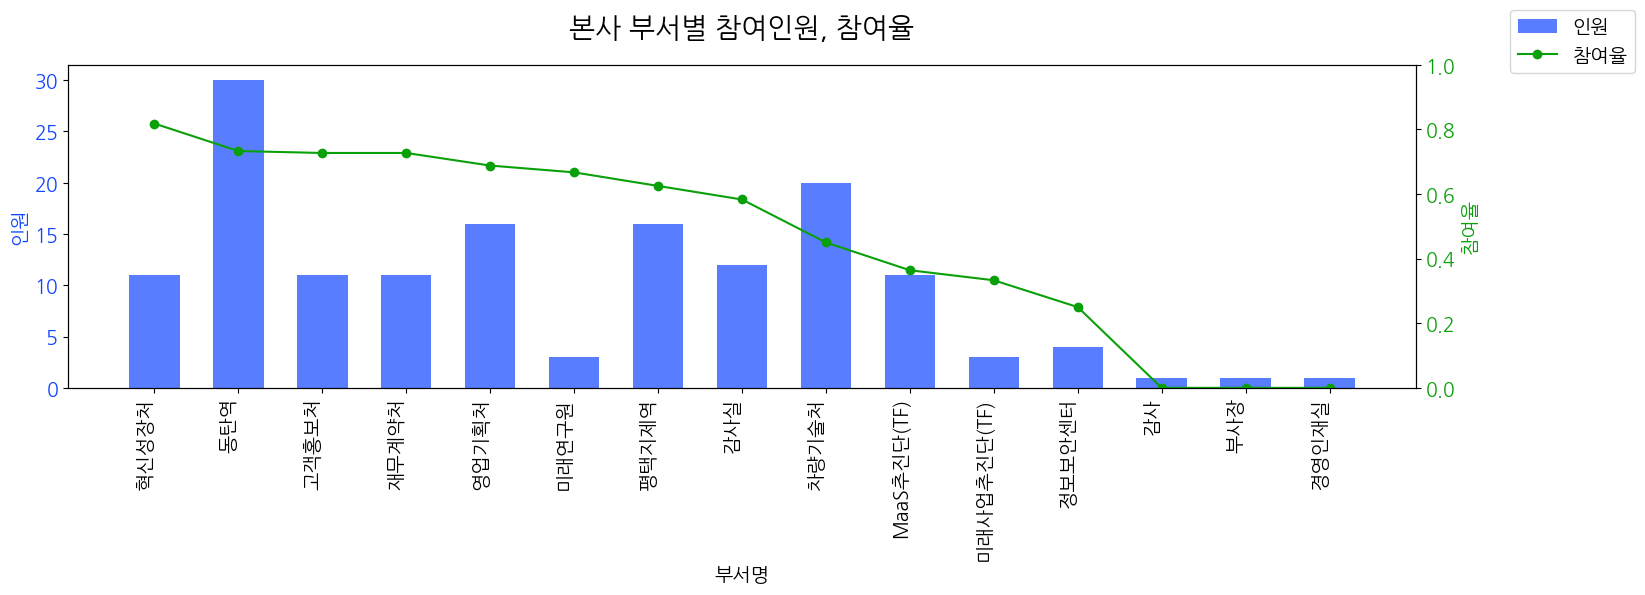

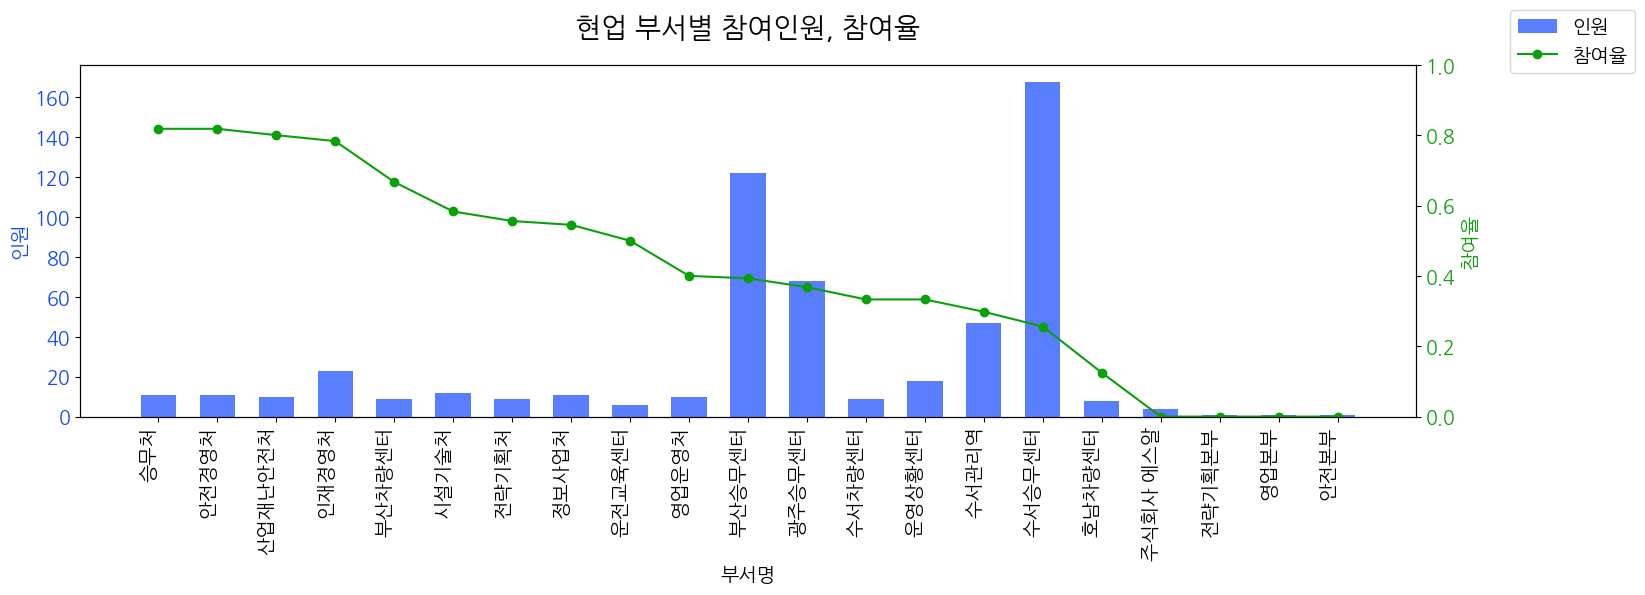

In [9]:
data = pd.read_csv("./data/본사_현업_참여.csv")
data['참여율'] = data['참여율'].str.replace('%', '').astype(float) / 100

headquarters_data = data[data['구분'] == '본사']
field_data = data[data['구분'] == '현업']

# 본사 데이터 시각화
plot_data(headquarters_data, "본사 부서별 참여인원, 참여율")

# 현업 데이터 시각화
plot_data(field_data, "현업 부서별 참여인원, 참여율")

### 4.연령대별 응답률

In [10]:
age_data_path = './data/연령대별 응답률.csv'
age_data = pd.read_csv(age_data_path)

age_data.head()

,연령 별 분류,전체 인원,응답자,미응답,응답율
0,20대,49,25,24,51.02%
1,30대,290,139,151,47.93%
2,40대,173,77,96,44.51%
3,50대,150,55,95,36.67%
4,60대,48,11,37,22.92%


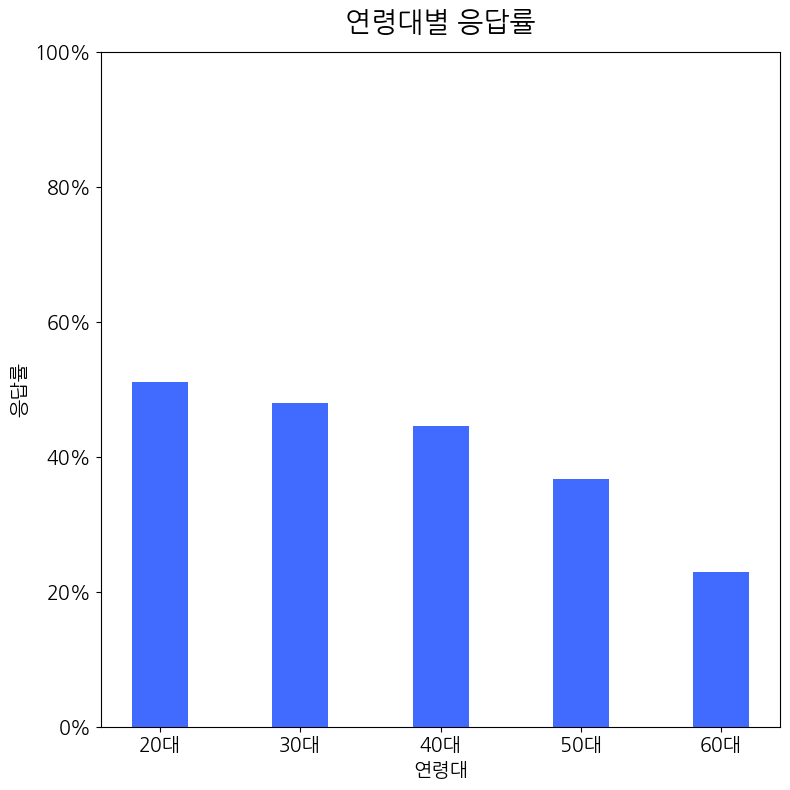

In [11]:
from matplotlib.ticker import PercentFormatter

# 응답율을 소수로 변환
age_data['응답율'] = age_data['응답율'].str.replace('%', '').astype(float) / 100

# 연령대 및 응답율 추출
ages = age_data['연령 별 분류'].tolist()
response_rates = age_data['응답율'].tolist()

# 폰트 크기 설정
text_and_label_size = 14
title_font_size = 20

# 그래프 생성
fig, ax = plt.subplots(figsize=(8, 8))

x = np.arange(len(ages))
bar_width = 0.4

# 막대 그래프
ax.bar(x, response_rates, color='#1246FF', alpha=0.8, width=bar_width)

# 축 및 제목 설정
ax.set_xlabel("연령대", fontsize=text_and_label_size)
ax.set_ylabel("응답률", fontsize=text_and_label_size)
ax.set_xticks(x)
ax.set_xticklabels(ages, fontsize=text_and_label_size)
ax.tick_params(axis='y', labelsize=text_and_label_size)
ax.set_title("연령대별 응답률", fontsize=title_font_size, pad=15)

# y축 포맷을 0% ~ 100%로 설정
ax.yaxis.set_major_formatter(PercentFormatter(1))

# y축 범위 설정
ax.set_ylim(0, 1)  # 응답율 범위 (0% ~ 100%)

# 그래프 출력
plt.tight_layout()
plt.savefig(f"{save_path}/03-연령대별 응답률.png", dpi=300, bbox_inches="tight")
plt.show()

### 5.컬처핏 통계

1.신뢰도

In [12]:
# 데이터 정의
labels = ['', '']
sizes = [93, 7]  # 퍼센트 값
colors = ["#39C039", "#868e96"]

# 폰트 크기 설정
title_font_size = 20
text_and_label_size = 14

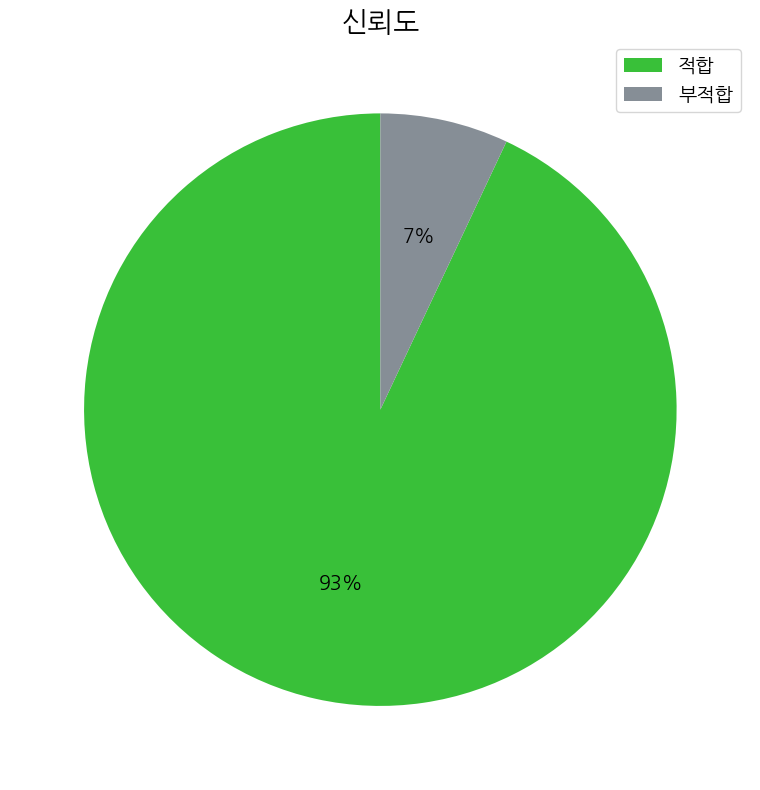

In [13]:
# 파이 차트 생성
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    sizes, 
    labels=labels, 
    colors=colors, 
    autopct='%1.0f%%', 
    startangle=90, 
    textprops={'fontsize': text_and_label_size}
)

# 제목 설정
plt.title("신뢰도", fontsize=title_font_size)

# 범례 설정
plt.legend(wedges, ['적합', '부적합'], fontsize=text_and_label_size, loc="upper right")

# 그래프 출력
plt.tight_layout()
plt.savefig(f"{save_path}/04-신뢰도.png", dpi=300, bbox_inches="tight")
plt.show()


2.컬처핏

In [14]:
# 데이터 정의
labels = ['우수', '보통', '검토필요']
sizes = [6, 59, 36]  # 퍼센트 값
colors = ["#39C039", "#4971FF", "#868e96"]

# 폰트 크기 설정
title_font_size = 20
text_and_label_size = 14

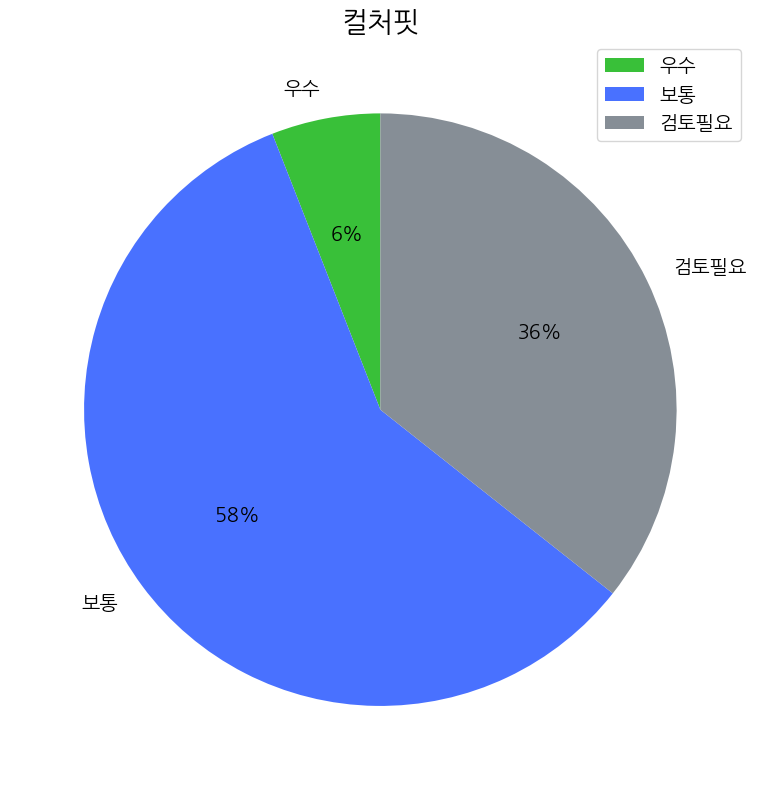

In [15]:
# 파이 차트 생성
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    sizes, 
    labels=labels, 
    colors=colors, 
    autopct='%1.0f%%', 
    startangle=90, 
    textprops={'fontsize': text_and_label_size}
)

# 제목 설정
plt.title("컬처핏", fontsize=title_font_size)

# 범례 설정
plt.legend(wedges, ['우수', '보통', '검토필요'], fontsize=text_and_label_size, loc="upper right")

# 그래프 출력
plt.tight_layout()
plt.savefig(f"./{save_path}/05-컬처핏.png", dpi=300, bbox_inches="tight")
plt.show()


3.비전핏

In [16]:
# 데이터 정의
labels = ['우수', '보통', '검토필요']
sizes = [0, 9, 91]  # 퍼센트 값
colors = ["#39C039", "#4971FF", "#868e96"]

# 폰트 크기 설정
title_font_size = 20
text_and_label_size = 14

In [17]:
labels = labels[1:]
sizes = sizes[1:]
colors = colors[1:]

leg = ['보통', '검토필요']

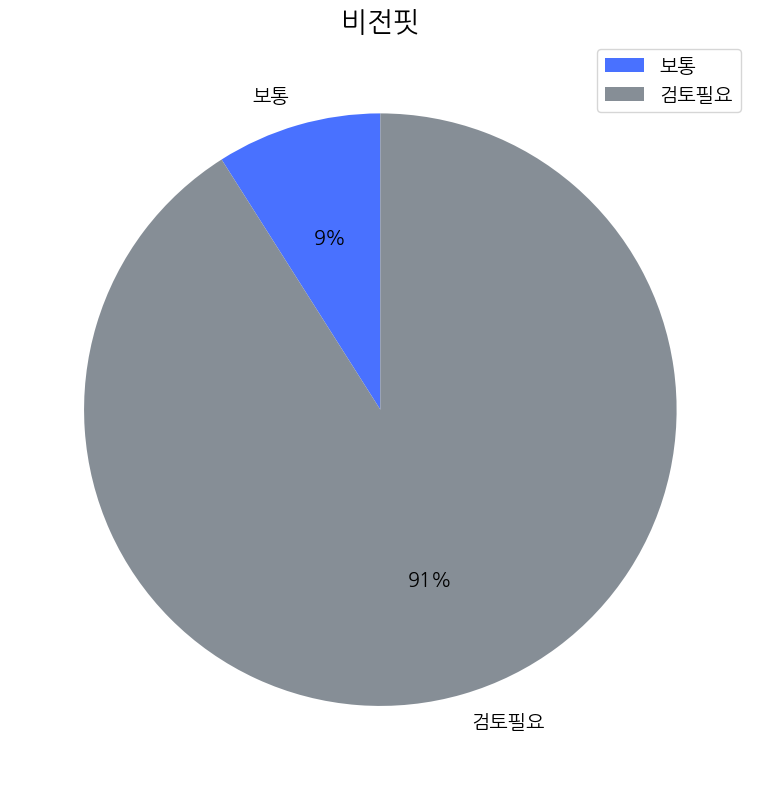

In [18]:
# 파이 차트 생성
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    sizes, 
    labels=labels, 
    colors=colors, 
    autopct='%1.0f%%', 
    startangle=90, 
    textprops={'fontsize': text_and_label_size}
)

# 제목 설정
plt.title("비전핏", fontsize=title_font_size)

# 범례 설정
plt.legend(wedges, labels, fontsize=text_and_label_size, loc="upper right")

# 그래프 출력
plt.tight_layout()
plt.savefig(f"./{save_path}/06-비전핏.png", dpi=300, bbox_inches="tight")
plt.show()

4.구성원 인재

In [19]:
# 데이터 정의
labels = ['우수', '보통', '검토필요']
sizes = [22, 78, 0]  # 퍼센트 값
colors = ["#39C039", "#4971FF", "#868e96"]

# 폰트 크기 설정
title_font_size = 20
text_and_label_size = 14

In [20]:
labels.pop()
sizes.pop()
colors.pop()

leg = labels

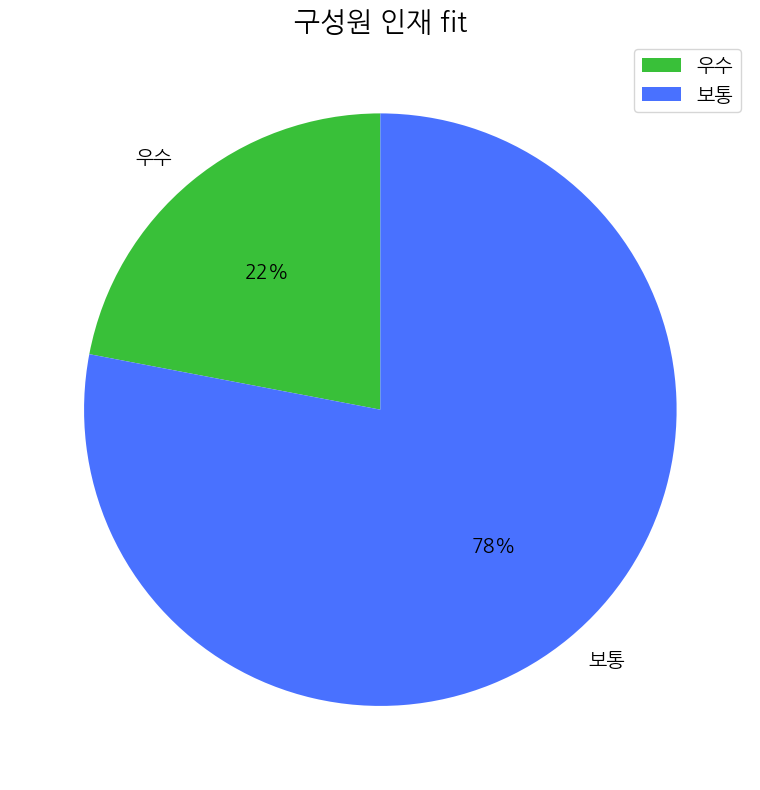

In [21]:
# 파이 차트 생성
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    sizes, 
    labels=labels, 
    colors=colors, 
    autopct='%1.0f%%', 
    startangle=90, 
    textprops={'fontsize': text_and_label_size}
)

# 제목 설정
plt.title("구성원 인재 fit", fontsize=title_font_size)

# 범례 설정
plt.legend(wedges, labels, fontsize=text_and_label_size, loc="upper right")

# 그래프 출력
plt.tight_layout()
plt.savefig(f"./{save_path}/07-구성원 인재 fit.png", dpi=300, bbox_inches="tight")
plt.show()